In [2]:
import sys
sys.path.append('../../')
#
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd.variable import Variable
from torchvision.utils import save_image
import torchvision.utils as vutils
import os
import torch
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
# from self
from utils.dataloaders.single_qrCode_field_dataset import QRCodeDataset, get_QRCode_dataloader
#
from pathlib import Path
from utils.F import ensure_folder, timestamp
# 超參數設置
batch_size = 512
num_epochs = 1000
latent_size = 128

# G, D num of feature maps
ngf = 64
ndf = 64

# dataset 的 transform 超參數.
dataset_im_size = 128  # 這數值會影響到 鑑別器的輸出，鑑別器的輸出要是 'scalar', if 為 128，D(x)輸出 5x5
num_output_channels = 3

lr = 0.0002

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# for save
save_loss_png_period_of_epoehes = 10
save_weight_each_epoch = 100

In [7]:
class Generator(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Generator, self).__init__()

        layer_depth = [512, 256, 128, 64, 32, num_output_channels]
        feature_map_ratio = [8, 4, 2, 1, 1, 1]
        layer_kernel_size = [4, 4, 4, 4, 4, 4]
        layer_stride = [1, 2, 2, 2, 2, 2]
        layer_padding = [0, 1, 1, 1, 1, 1]

        #
        layers = []
        num_layers = len(layer_depth)

        for i in range(num_layers-1):  # -1 是因為不要去迭代最後一層
            out_channels = layer_depth[i]
            ratio = feature_map_ratio[i]
            ks = layer_kernel_size[i]
            pad = layer_padding[i]
            stride = layer_stride[i]
            layers.append(nn.ConvTranspose2d(in_channels, out_channels, ks, stride, pad, bias=False))
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.ReLU(True))

            in_channels = out_channels

        layers.append(nn.ConvTranspose2d(in_channels, num_output_channels, layer_kernel_size[num_layers-1],
                                         layer_stride[num_layers-1],
                                         layer_padding[num_layers-1], bias=False)
                      )
        layers.append(nn.Tanh())

        self.main = nn.Sequential(*layers)
    def forward(self, input):
        return self.main(input)

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # 檢查是否有可用的 GPU，否則使用 CPU
device

device(type='cuda')

In [18]:
hi_g = Generator(in_channels=128, out_channels=3).to(device)

In [19]:
hi_g.load_state_dict(torch.load("./best_generator.pth"))

<All keys matched successfully>

torch.Size([1, 128, 1, 1])

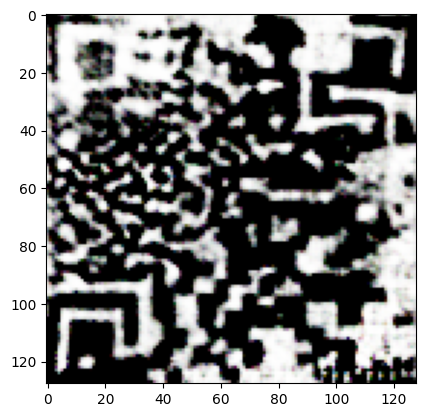

In [85]:
bs = 1
depth = 128
height = 1 
width =  1

tensor_std_normal = torch.randn((bs, depth, height, width), device=device)

# 調整一下網路生出來的資料
gen_image = hi_g(tensor_std_normal).detach().cpu().numpy()
# (1, 2, 0)  ==  (w, h, c) numpy style
gen_image = np.transpose(gen_image[0], (1, 2, 0))

# show it
plt.imshow(gen_image.clip(0,1));

FileNotFoundError: [Errno 2] No such file or directory: './aaa.pth'